## Problem Statement
 

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

For many incumbent operators, retaining high profitable customers is the number one business goal. 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

### Definitions of Churn

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the usage-based definition to define churn.

### High-value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

### Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# Importing the basic required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Reading the input data and preview
churn= pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking data stats
print('** DATA SHAPE **')
print(churn.shape)
print('\n** DATA INFO **')
print(churn.info())
print('\n** DATA DESCRIPTION **')
churn.describe()

** DATA SHAPE **
(99999, 226)

** DATA INFO **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None

** DATA DESCRIPTION **


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Data Cleaning and Preparation

##### Custom Function definition for data cleaning


In [4]:
# Function to return the columns with more than missingCutoff% missing values.
def getMissingValues(data, missingCutoff):
    missing = round(100*(data.isnull().sum() / data.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]), missingCutoff))
    return missing.loc[missing > missingCutoff]

In [5]:
# Function impute the NaN values/entries with 0
# Check -> 1 : do for  *_6/7/8/9
#       -> 2 : normal impute
def imputeNan(data, imputeColList, check):
    if check == 1:
        for col in [feature + month for month in ['_6','_7','_8','_9'] for feature in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:
        for col in imputeColList:
            data[col].fillna(0, inplace=True)

In [6]:
# Function to plot Histogram
# Source of function definition: Stackoverflow
def plot_hist(data, col, binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(data[col],bins=range(0,data[col].max(),round(binsize)), facecolor='lightblue', edgecolor='red')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()

##### Missing Data treatment

In [7]:
# Checking for >50% missing values in columns
getMissingValues(churn, 50)

There are 40 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

Some of the features are important features and thus cannot be eliminated just becasue they have more than 50% of data as empty. We will thus impute them with "0" to be able to add them into our analysis. 
The features are namely, 'av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g', 'max_rech_data', 'total_rech_data','fb_user','night_pck_user'

In [8]:
# Imputing features : NaN -> 0
imputeNan(churn, ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g', 'max_rech_data', 'total_rech_data','fb_user','night_pck_user'], 1)

In [9]:
# Checking which all columns have missing values now
getMissingValues(churn, 50)

There are 4 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [10]:
# This columns we can drop as they do not bring in much value with more than 50% missing data
churn.drop(list(getMissingValues(churn, 50).index), axis=1, inplace = True)
churn.shape

There are 4 features having more than 50% missing values/entries


(99999, 222)

In [11]:
# Columns having more than 5% missing values
getMissingValues(churn, 5)

There are 29 features having more than 5% missing values/entries


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

All the features above having 8% missng values are of the month September

In [12]:
# Checking if the same customers have missing values for all these fields
missingCol = list(getMissingValues(churn, 5).index)

print("%d customers have 8 percent missing values together"%len(churn[churn[missingCol].isnull().all(axis = 1)]))

There are 29 features having more than 5% missing values/entries
7745 customers have 8 percent missing values together


In [13]:
# We will thus impute these values with 0
imputeNan(churn, missingCol, 0)

In [14]:
# Columns having more than 2% missing values
getMissingValues(churn, 2)

There are 89 features having more than 2% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
                      ... 
loc_ic_t2f_mou_8       5.0
loc_ic_mou_6           4.0
loc_ic_mou_7           4.0
loc_ic_mou_8           5.0
std_ic_t2t_mou_6       4.0
std_ic_t2t_mou_7       4.0
s

In [15]:
# Checking if the same customers have missing values for all these fields
missingCol = list(getMissingValues(churn, 2).index)

print("%d customers have > 2 percent missing values together"%len(churn[churn[missingCol].isnull().all(axis = 1)]))

There are 89 features having more than 2% missing values/entries
381 customers have > 2 percent missing values together


In [16]:
# We will drop these customers
churn=churn[~churn[missingCol].isnull().all(axis=1)]
churn.shape

(99618, 222)

In [17]:
# We will impute the rest of the missing values with 0

missingCol.remove('date_of_last_rech_8') # Removing these two to be treated later as they will be having categorical data
missingCol.remove('date_of_last_rech_9')
imputeNan(churn, missingCol, 0)

In [18]:
churn.shape

(99618, 222)

In [19]:
# Columns having more than 0% missing values
missingCol = getMissingValues(churn, 0)
missingCol

There are 9 features having more than 0% missing values/entries


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [20]:
# Let's explore these a bit more
missingCol = getMissingValues(churn, 0)
for col in missingCol.index:
    print(col, churn[col].unique())

There are 9 features having more than 0% missing values/entries
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_8 ['8/31/2014' nan]
last_date_of_month_9 ['9/30/2014' nan]
date_of_last_rech_6 ['6/21/2014' '6/29/2014' '6/17/2014' '6/28/2014' '6/26/2014' '6/19/2014'
 '6/27/2014' '6/25/2014' '6/14/2014' '6/18/2014' '6/20/2014' '6/30/2014'
 '6/23/2014' nan '6/22/2014' '6/24/2014' '6/12/2014' '6/3/2014'
 '6/11/2014' '6/16/2014' '6/10/2014' '6/15/2014' '6/13/2014' '6/7/2014'
 '6/8/2014' '6/6/2014' '6/2/2014' '6/4/2014' '6/5/2014' '6/1/2014'
 '6/9/2014']
date_of_last_rech_7 ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
date_of

In [21]:
# These features, we will repalce them with their mode
colImpute = missingCol
for col in colImpute.index:
    churn[col].fillna(churn[col].mode()[0], inplace = True)

In [22]:
# Columns having more than 0% missing values
missingCol = getMissingValues(churn, 0)
missingCol

There are 0 features having more than 0% missing values/entries


Series([], dtype: float64)

In [23]:
# Checking columns having all values as zero
zero_columns = churn.columns[(churn == 0).all()]
print ("There are {} features which has only 0 as values.".format(len(zero_columns)))
zero_columns

There are 11 features which has only 0 as values.


Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [24]:
# Let's remove these columns as well. All take a single value '0'. 
churn.drop(zero_columns,axis=1,inplace=True)

In [25]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(churn.shape[0]/99999 * 100,2)))
print ("Number of customers: {}".format(churn.shape[0]))
print ("Number of features: {}".format(churn.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 211


##### Fixing Data Types and Columns

In [26]:
# list of all columns which store date
date_columns = list(churn.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [27]:
# Converting dtype of date columns to datetime
for col in date_columns:
    churn[col] = pd.to_datetime(churn[col], format='%m/%d/%Y')

In [28]:
# Checking data stats
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99618 entries, 0 to 99998
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 161.1 MB


In [29]:
# Renaming columns to standard _6/7/8/9 format for maintaining consistency,
#'jun_vbc_3g' -> 'vbc_3g_6'
#'jul_vbc_3g' -> 'vbc_3g_7'
#'aug_vbc_3g' -> 'vbc_3g_8'
#'sep_vbc_3g' -> 'vbc_3g_9'
churn.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

##### Feature Engineering

###### Derived Feature 1: vol_data_mb_6, vol_data_mb_7, vol_data_mb_8, vol_data_mb_9
Feature to store the total data volume (vol_2gmb + vol_3gmb) used by user.

In [30]:
for i in range(6,10):
    churn['vol_data_mb_'+str(i)] = (churn['vol_2g_mb_'+str(i)]+churn['vol_3g_mb_'+str(i)]).astype(int)

###### Derived Feature 2: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
Feature to store the average recharge value for each customer for every month

In [31]:
for i in range(6,10):
    churn['avg_rech_amt_'+str(i)] = round(churn['total_rech_amt_'+str(i)]/churn['total_rech_num_'+str(i)]+1,2)
    
imputeNan(churn, ['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'], 0)

###### Derived Feature 3: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
Feature to store the total number of data recharge (count_rech_2g + count_rech_3g) for each month.

In [32]:
for i in range(6,10):
    churn['total_rech_num_data_'+str(i)] = (churn['count_rech_2g_'+str(i)]+churn['count_rech_3g_'+str(i)]).astype(int)

###### Derived Feature 4: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
Feature to store the total amount of data recharge for each month.

In [33]:
for i in range(6,10):
    churn['total_rech_amt_data_'+str(i)] = churn['total_rech_num_data_'+str(i)]*churn['av_rech_amt_data_'+str(i)]

###### Derived Feature 5: total_rech_month_6, total_rech_month_7,total_rech_month_8,total_rech_month_9
Feature to store the total amount of recharge for each month

In [34]:
for i in range(6,10):
    churn['total_rech_month_'+str(i)] = churn['total_rech_amt_'+str(i)]+churn['total_rech_amt_data_'+str(i)]

In [35]:
# Let's check the total_rech_month_* values that we have created to find out the high customers
churn.filter(regex=('total_rech_month_')).head()

,total_rech_month_6,total_rech_month_7,total_rech_month_8,total_rech_month_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


##### Filter high-value customers as we need to perform analysis for only these customers

High value customers are those who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months (the good phase).

In [36]:
# Let's find out the avg of the total_rech_month_6 and total_rech_month_7 ie the good phase.
churn['avg_total_rech_month_6_7'] = churn[['total_rech_month_6','total_rech_month_7']].mean(axis=1)

In [37]:
churn['avg_total_rech_month_6_7'].head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: avg_total_rech_month_6_7, dtype: float64

In [38]:
# Let's find out the different percentile divisions
churn[['total_rech_month_6','total_rech_month_7','avg_total_rech_month_6_7']].quantile(np.linspace(.1, 1, 9, 0))

,total_rech_month_6,total_rech_month_7,avg_total_rech_month_6_7
0.1,0.0,0.0,60.0
0.2,90.0,80.0,110.0
0.3,130.0,123.0,155.0
0.4,200.0,192.0,210.0
0.5,266.0,260.0,276.0
0.6,356.0,350.0,361.0
0.7,477.0,478.9,479.5
0.8,652.0,666.0,658.3
0.9,1026.0,1067.0,1030.0


###### Filtering data based on the 70 percentile rule

In [39]:
churn = churn[(churn['avg_total_rech_month_6_7'] >= churn['avg_total_rech_month_6_7'].quantile(0.7))]

In [40]:
# Checking data stats
print('** DATA SHAPE **')
print(churn.shape)
print('\n** DATA INFO **')
print(churn.info())
print('\n** DATA DESCRIPTION **')
churn.describe()

** DATA SHAPE **
(29906, 232)

** DATA INFO **
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Columns: 232 entries, mobile_number to avg_total_rech_month_6_7
dtypes: datetime64[ns](8), float64(181), int32(8), int64(35)
memory usage: 52.2 MB
None

** DATA DESCRIPTION **


,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_rech_month_6,total_rech_month_7,total_rech_month_8,total_rech_month_9,avg_total_rech_month_6_7
count,2.990600e+04,29906.0,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,

##### Tagging Churn Customers

Churned customers are those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [41]:
# Churned customers are marked as 1 and non-churned as 0
churn['churn_flag'] = np.where(((churn['total_ic_mou_9'] == 0.00) | (churn['total_og_mou_9'] == 0.00)) & ((churn['vol_2g_mb_9'] == 0.00) | (churn['vol_3g_mb_9'] == 0.00)), 1, 0)

In [42]:
# Let's get a count of the churned and non-churned customers
print('{} out of {} High-Valued customers have churned at a % of {}'.format(len(churn[churn.churn_flag == 1]), churn.shape[0], round(len(churn[churn.churn_flag == 1])/churn.shape[0] *100,2)))

3238 out of 29906 High-Valued customers have churned at a % of 10.83


###### Note: Here we observe a high class imbalance as there are only about 10% customers who churned and about 90% customers who did not churn. We need to make considerations while training our models or else we might end up introducing a bias towards the dominant class.

In [43]:
# Let us now remove the features related to month 9 or Sep from the data as we do not want this data to train our model. This is because we will be predicting the customer behavior for this month and the model should not have access to any data pertaining to this month while prediction.
churn = churn.drop(churn.filter(regex='_9', axis = 1).columns, axis=1) # Note: We need not make checks for Sep as we have already handled that in the data cleaning phase

In [44]:
# Removing the datatime columns
dateTimeCols = list(churn.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
churn.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [45]:
# Checking data stats
print('** DATA SHAPE **')
print(churn.shape)
print('\n** DATA INFO **')
print(churn.info())
print('\n** DATA DESCRIPTION **')
churn.describe()

** DATA SHAPE **
(29906, 170)

** DATA INFO **
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29906 entries, 0 to 99997
Columns: 170 entries, mobile_number to churn_flag
dtypes: float64(136), int32(7), int64(27)
memory usage: 38.2 MB
None

** DATA DESCRIPTION **


,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_month_6,total_rech_month_7,total_rech_month_8,avg_total_rech_month_6_7,churn_flag
count,2.990600e+04,29906.0,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.0000

### Exploratory Data Analysis

In [46]:
# Columns containing data related to monthly behavior of customers
colMonth = churn.filter(regex=('_6|_7|_8')).columns
print("{} number of features are related to monthly behavior of customers as follows:\n {}".format(len(colMonth), colMonth))

# Columns containing data not related to monthly behavior of customers
colNonMonth = [col for col in churn.columns if col not in colMonth]
print("{} number of features are not related to monthly behavior of customers as follows:\n {}".format(len(colNonMonth), colNonMonth))

166 number of features are related to monthly behavior of customers as follows:
 Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'total_rech_num_data_6', 'total_rech_num_data_7',
       'total_rech_num_data_8', 'total_rech_amt_data_6',
       'total_rech_amt_data_7', 'total_rech_amt_data_8', 'total_rech_month_6',
       'total_rech_month_7', 'total_rech_month_8', 'avg_total_rech_month_6_7'],
      dtype='object', length=166)
4 number of features are not related to monthly behavior of customers as follows:
 ['mobile_number', 'circle_id', 'aon', 'churn_flag']


In [47]:
# First let us explore the data related to the non monthly behavior based features
for col in colNonMonth:
    print('Fetaure {} -> {} no of unique entries'.format(col, len(churn[col].unique())))

Fetaure mobile_number -> 29906 no of unique entries
Fetaure circle_id -> 1 no of unique entries
Fetaure aon -> 3294 no of unique entries
Fetaure churn_flag -> 2 no of unique entries


"circle_id" has only one value in all the rows. This makes it clear that all the data is collected from the same circle. Hence, this will not have an impact on our model building.

In [48]:
# We will thus drop circle_id
churn.drop('circle_id', axis = 1, inplace = True)

###### Hist for AON

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64


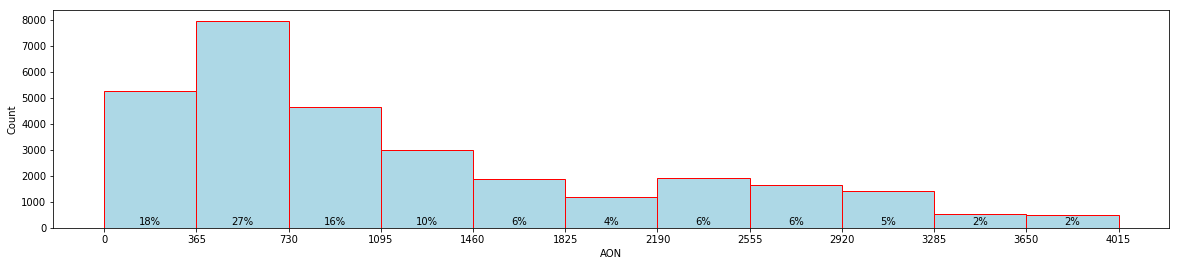

In [49]:
# We will go ahead and plot a histogram to explore the customer age on the network
print(churn.aon.describe())
plot_hist(churn,'aon',365)

In [50]:
# Create Derived categorical variable with bins for each year
churn['aon_bin'] = pd.cut(churn['aon'], range(0,churn['aon'].max(),365), labels=range(0,int(round(churn['aon'].max()/365))-1))

In [51]:
# Let's check out the count of various bins
churn['aon_bin'].value_counts()

1     7965
0     5267
2     4619
3     2989
6     1904
4     1891
7     1645
8     1413
5     1165
9      523
10     500
Name: aon_bin, dtype: int64

###### Incoming/Outgoing MOU VS Month vs Churn

Text(0, 0.5, 'Avg. Outgoing MOU')

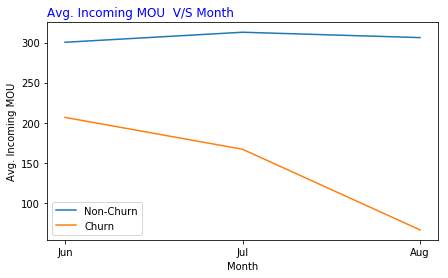

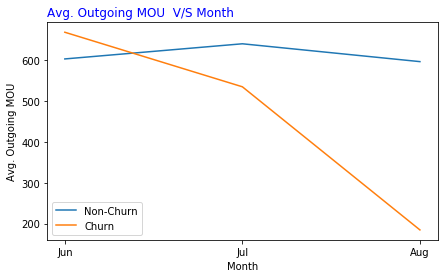

In [52]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']

# Incoming MOU vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[ic_col].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Avg. Incoming MOU  V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Avg. Incoming MOU")

# Outgoing MOU vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[og_col].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Avg. Outgoing MOU  V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Avg. Outgoing MOU")

We can see from the above graphs, 
- The Non-Churn customers have a consistent rate of incoming and outgoing calls.
- There is a significant drop in the rate of calls especially outgoing calls for customers who have Churned.
- Thus we can consider incoming and outgoing call features an important predictor of churn

###### Derived Feature 6: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
Instead of taking incoming and outgoing calls seperately, we will take the ratio between the ic and og calls as it would be a better predictor.

In [53]:
for i in range(6,9):
    churn['og_to_ic_mou_'+str(i)] = (churn['total_og_mou_'+str(i)])/(churn['total_ic_mou_'+str(i)]+1)

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn_flag,,,
0,5.637070,5.423163,5.055538
1,12.915973,12.721059,9.458137


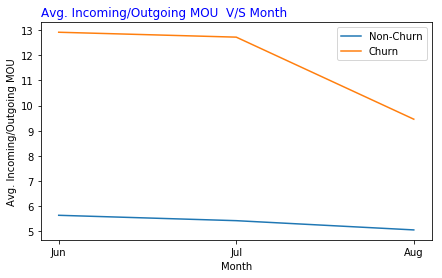

In [54]:
og_to_ic_mou_list = ['og_to_ic_mou_6', 'og_to_ic_mou_7', 'og_to_ic_mou_8']

# Outgoing/Incoming MOU vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[og_to_ic_mou_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Avg. Incoming/Outgoing MOU  V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Avg. Incoming/Outgoing MOU")

churn.groupby(['churn_flag'])[og_to_ic_mou_list].mean()

We see that the ratio of og and ic holds a similar trend as well. 

###### Derived Feature 7: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
Similarly for local calls, we will take the ratio between the ic and og calls as it would be a better predictor.

In [55]:
for i in range(6,9):
    churn['loc_og_to_ic_mou_'+str(i)] = (churn['loc_og_mou_'+str(i)])/(churn['loc_ic_mou_'+str(i)]+1)

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn_flag,,,
0,1.703503,1.778945,1.670871
1,5.256204,5.026851,4.617114


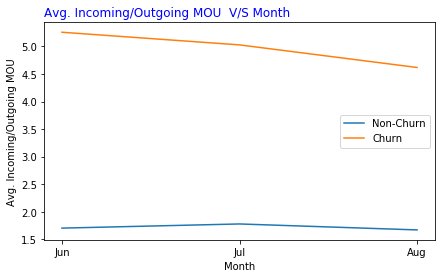

In [56]:
loc_og_to_ic_mou_list = ['loc_og_to_ic_mou_6', 'loc_og_to_ic_mou_7', 'loc_og_to_ic_mou_8']

# Outgoing/Incoming MOU vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[loc_og_to_ic_mou_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Avg. Incoming/Outgoing MOU  V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Avg. Incoming/Outgoing MOU")

churn.groupby(['churn_flag'])[loc_og_to_ic_mou_list].mean()

We will refrain from doing the same for the isd calls as there will be a number of 0 values there.

###### Total monthly rech VS Month vs Churn

,total_rech_month_6,total_rech_month_7,total_rech_month_8
churn_flag,,,
0,1106.236866,1211.474085,1121.907699
1,1216.503101,1023.064327,451.302057


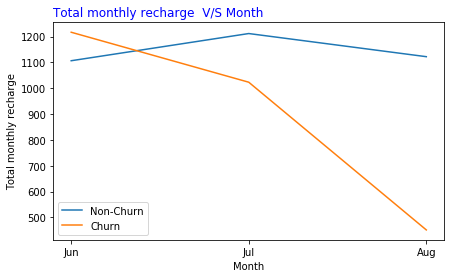

In [57]:
total_rech_month_list = ['total_rech_month_6', 'total_rech_month_7', 'total_rech_month_8']

# Total monthly recharge vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[total_rech_month_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Total monthly recharge  V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Total monthly recharge")

churn.groupby(['churn_flag'])[total_rech_month_list].mean()

###### Total data volume vs Month vs Churn

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn_flag,,,
0,469.966702,504.359982,485.806472
1,482.463867,426.596356,228.196726


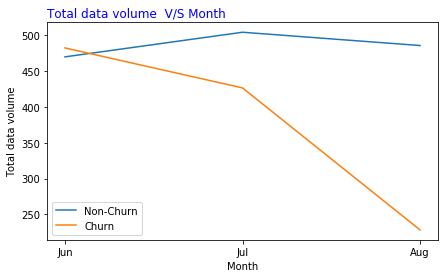

In [58]:
vol_data_mb_list = ['vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8']

# Total monthly recharge vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[vol_data_mb_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Total data volume  V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Total data volume")

churn.groupby(['churn_flag'])[vol_data_mb_list].mean()

###### Last day recharge amount VS Month vs Churn

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn_flag,,,
0,100.358782,102.648755,98.329834
1,105.675108,82.151328,44.297097


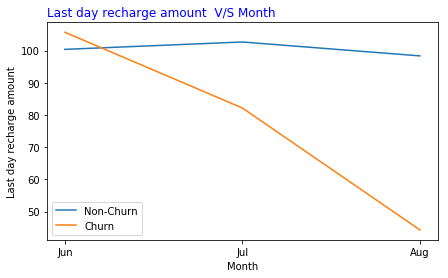

In [59]:
last_day_rch_amt_list = ['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

# Total monthly recharge vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[last_day_rch_amt_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Last day recharge amount  V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Last day recharge amount")

churn.groupby(['churn_flag'])[last_day_rch_amt_list].mean()

###### Max recharge amount VS Month vs Churn

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn_flag,,,
0,169.399393,174.027786,168.492575
1,168.518221,158.653181,93.095738


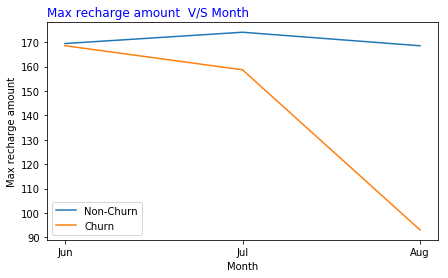

In [60]:
max_rech_amt_list = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']

# Total monthly recharge vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[max_rech_amt_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Max recharge amount  V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Max recharge amount")

churn.groupby(['churn_flag'])[max_rech_amt_list].mean()

###### ARPU (Average Revenue Per User) vs Month vs Churn

,arpu_6,arpu_7,arpu_8
churn_flag,,,
0,554.943196,570.134029,543.120971
1,590.622339,491.469208,230.268334


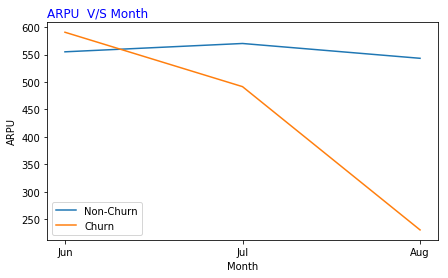

In [61]:
arpu_list = ['arpu_6', 'arpu_7', 'arpu_8']

# Total monthly recharge vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[arpu_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("ARPU  V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("ARPU")

churn.groupby(['churn_flag'])[arpu_list].mean()

In [62]:
# dropping columns that are not required

churn.drop(['mobile_number', 'aon_bin', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8'], axis = 1, inplace = True)

### Model Building 1 : Predictive Model

In [63]:
# Let's check the shape of the data we have at hand
churn.shape

(29906, 162)

###### Splitting data into training and testing data


In [64]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = churn.drop(['churn_flag'], axis=1)

#putting target variable in y
y = churn['churn_flag']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Re-scalling the features to help in convergence

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)

# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

In [67]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (20934, 161)
Training dataset target size (20934,)
Test dataset size (8972, 161)
Test dataset target size (8972,)


##### Importing necessary libraries

In [68]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

##### Handling class imbalance


In [69]:
# We will use Synthetic Minority Oversapling Technique (SMOTE)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [70]:
print('Before Sampling -------')
print('Counts of label "1": {}'.format(sum(y_train == 1)))
print('Counts of label "0": {}'.format(sum(y_train == 0)))
print('Churn event rate : {}% \n'.format(round(sum(y_train == 1) / len(y_train) * 100, 2)))
print('After Sampling --------')
print('Counts of label "1": {}'.format(sum(y_train_res == 1)))
print('Counts of label "0": {}'.format(sum(y_train_res == 0)))
print('Churn event rate : {}% \n'.format(round(sum(y_train_res == 1) / len(y_train_res) * 100, 2)))

Before Sampling -------
Counts of label "1": 2284
Counts of label "0": 18650
Churn event rate : 10.91% 

After Sampling --------
Counts of label "1": 18650
Counts of label "0": 18650
Churn event rate : 50.0% 



#### Principle Component Analysis (PCA)

In [71]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)

# Doing PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

We will plot the **Screeplot** to visualize and take a call on the number of features in a better way

In [72]:
pca.explained_variance_ratio_[:50]

array([0.12398825, 0.10410523, 0.07640731, 0.05651061, 0.03826481,
       0.03335683, 0.02983312, 0.02690016, 0.02615231, 0.02278579,
       0.0199207 , 0.01758968, 0.0162352 , 0.01583734, 0.01503459,
       0.01410391, 0.01253197, 0.01193989, 0.01142861, 0.01114576,
       0.01046708, 0.0099771 , 0.00966435, 0.00908894, 0.00901163,
       0.00883368, 0.00863965, 0.00847748, 0.00819375, 0.0079855 ,
       0.00727917, 0.00698955, 0.00673971, 0.00663704, 0.00656224,
       0.00617375, 0.00593488, 0.00586394, 0.00567509, 0.00545773,
       0.00521095, 0.00504862, 0.00491376, 0.00481887, 0.00479712,
       0.00445324, 0.00442252, 0.00437829, 0.00419324, 0.00409271])

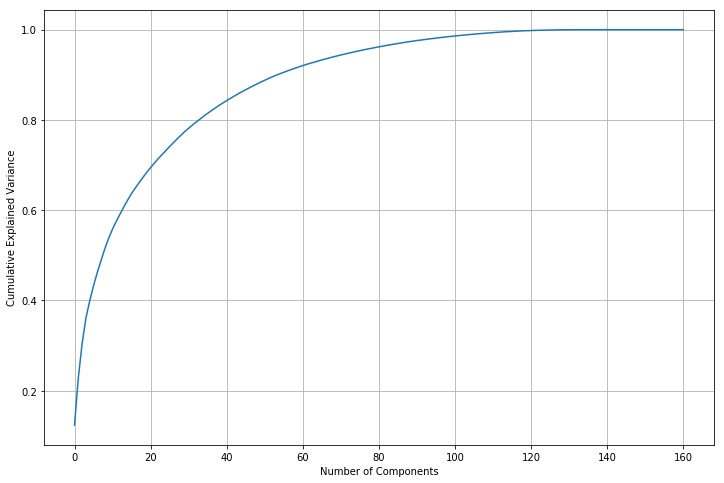

In [73]:
# Screeplot
fig = plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

We can see that somewhere around 75 features will be enough to explain about 95% of variance in data

In [74]:
# Selecting a variance cutoff of 0.95 and running PCA again to confirm our finding
pca_1 = PCA(0.95)
df_train_pca_1 = pca_1.fit_transform(X_train_res)
df_train_pca_1.shape

(37300, 75)

PCA with a **cutoff at 0.95 showed that 75 features can explain 95% of the variance in data**

In [75]:
# Using incremental PCA for faster results
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 75)

In [76]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(37300, 75)

In [77]:
# Creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

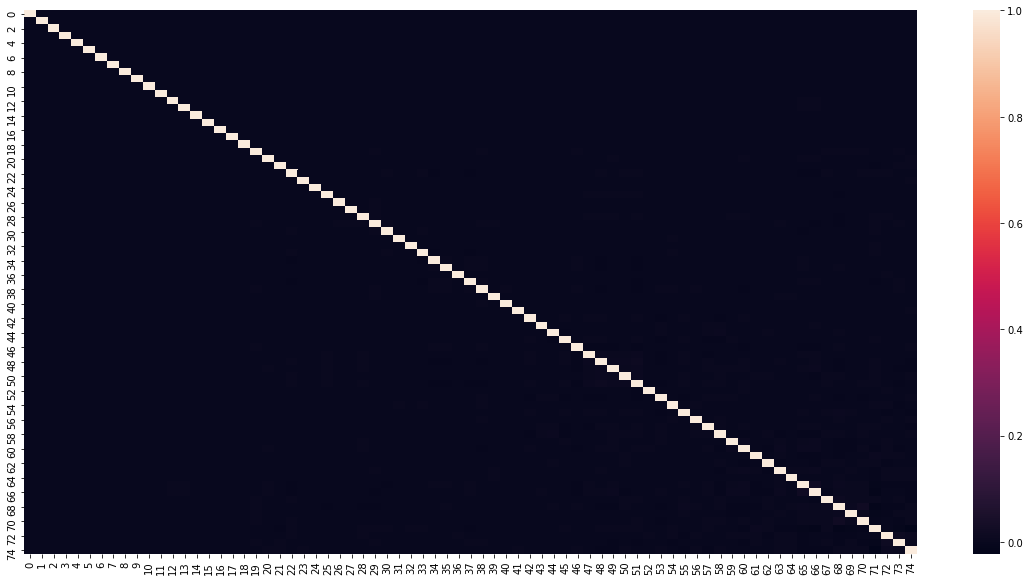

In [78]:
# Plotting the correlation matrix in the form of a heatmap
plt.figure(figsize = (20,10))
sns.heatmap(corrmat)

From the above heatmap it is evident that there are no correlations between the principal components

In [79]:
# Applying selected components to the test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 75)

###### Some more PCA for visualization

In [180]:
pca_1 = IncrementalPCA(n_components = 2)
newdata = pca_1.fit_transform(X_train_res)

In [181]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2"])
df.head()

,PC1,PC2
0,-2.183918,-0.223989
1,-3.165369,4.547159
2,0.995658,0.471996
3,-4.368918,5.014410
4,-3.362282,0.267378


In [182]:
df = pd.concat([df, y_train_res], axis=1)

In [183]:
df.head()

,PC1,PC2,churn_flag
0,-2.183918,-0.223989,0
1,-3.165369,4.547159,0
2,0.995658,0.471996,0
3,-4.368918,5.014410,0
4,-3.362282,0.267378,0


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


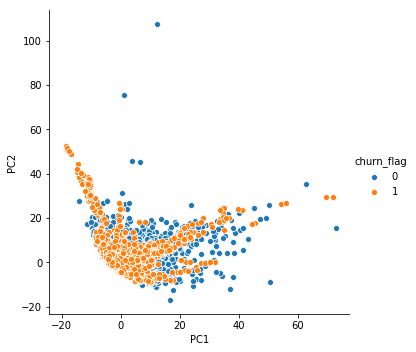

In [184]:
# Visualize
sns.pairplot(data = df, x_vars = ["PC1"], y_vars = ["PC2"], hue = "churn_flag", size=5)

We can see that in 2-D space, we are not able to properly distinguish between the 0 and 1 churn values. We will attempt to visualize this in 3-D space to get a better understanding.

Text(0.5, 0, 'Churn Flag')

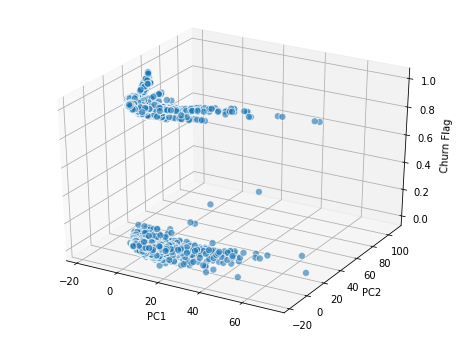

In [196]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['PC1']
ys = df['PC2']
zs = df['churn_flag']
color = ['r','b']
ax.scatter(xs, ys, zs, zdir=u'z', s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Churn Flag')

Plotting with churn_flag as the Z-axis we are clearly able to distinguish between the two clusters

### Model 1: Logistic Regression

We will first apply logistic regression on our principal components to get a baseline metrics

In [144]:
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced', max_iter = 300)

In [145]:
# Fitting
lr0.fit(X_train_pca, y_train_res)
        
# Predict training set:
dtrain_predictions = lr0.predict(X_train_pca)
dtrain_predprob = lr0.predict_proba(X_train_pca)[:,1]
    
# Perform cross-validation:
cv_score = cross_val_score(lr0, X_train_pca, y_train_res, cv = 5, scoring = 'roc_auc')
    
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train_res, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_res, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_res, dtrain_predprob))
    
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))


Model Report
Accuracy : 0.8305
Recall/Sensitivity : 0.8474
AUC Score (Train): 0.901062
CV Score : Mean - 0.8999175 | Std - 0.006854454 | Min - 0.8869975 | Max - 0.9068288


In [147]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)

confusion = metrics.confusion_matrix(y_test, pred_probs_test)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_test, pred_probs_test)))

Roc_auc_score : 0.8038836098861419
Sensitivity/Recall : 0.790356394129979
Specificity: 0.8174108256423048
False Positive Rate: 0.18258917435769517
Positive predictive value: 0.33994589720468893
Negative Predictive value: 0.9703879182706544
sklearn precision score value: 0.33994589720468893


In [148]:
# Predict with 0.5 prob cutoff
pred_probs = lr0.predict_proba(X_train_pca)[:,1]
    
y_df = pd.DataFrame({'churn': y_train_res, 'churn_Prob': pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_df.churn, y_df.final_predicted)))

Roc_auc_score : 0.8304557640750669
Sensitivity/Recall : 0.8473994638069705
Specificity: 0.8135120643431636
False Positive Rate: 0.18648793565683647
Positive predictive value: 0.8196245202779795
Negative Predictive value: 0.842046842046842
sklearn precision score value: 0.8196245202779795


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.684129  0.977480  0.390777
0.2   0.2  0.748981  0.954960  0.543003
0.3   0.3  0.791716  0.930456  0.652976
0.4   0.4  0.819196  0.897212  0.741180
0.5   0.5  0.830456  0.847399  0.813512
0.6   0.6  0.828499  0.783324  0.873673
0.7   0.7  0.805764  0.693673  0.917855
0.8   0.8  0.761903  0.573458  0.950349
0.9   0.9  0.633432  0.286810  0.980054


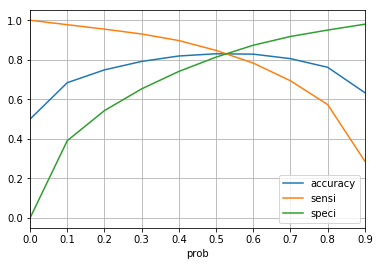

In [149]:
# Let's explore the different cut-off probabilities

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_df[i] = y_df.churn_Prob.map( lambda x: 1 if x > i else 0)

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_df.churn, y_df[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
        
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i , accuracy, sensi, speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.grid(True)
plt.show()

In [150]:
# Predict with 0.55 prob cutoff
pred_probs = lr0.predict_proba(X_train_pca)[:,1]
    
y_df = pd.DataFrame({'churn': y_train_res, 'churn_Prob': pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.55 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_df.churn, y_df.final_predicted)))

Roc_auc_score : 0.8298391420911528
Sensitivity/Recall : 0.8169973190348525
Specificity: 0.842680965147453
False Positive Rate: 0.15731903485254692
Positive predictive value: 0.8385339276869738
Negative Predictive value: 0.8215798003032045
sklearn precision score value: 0.8385339276869738


###### Prediction on the Test Data

In [152]:
# Predict with 0.55 prob cutoff
pred_probs = lr0.predict_proba(X_test_pca)[:,1]
    
y_df = pd.DataFrame({'churn': y_test, 'churn_Prob': pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.55 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_df.churn, y_df.final_predicted)))

Roc_auc_score : 0.8004066322472551
Sensitivity/Recall : 0.7547169811320755
Specificity: 0.8460962833624345
False Positive Rate: 0.15390371663756547
Positive predictive value: 0.368474923234391
Negative Predictive value: 0.9666571672841265
sklearn precision score value: 0.368474923234391


#### Logistic Regression Result

Logistic Regression with PCA and selecting an optimal probability cutoff of 0.55 we get

- Train Recall : 83% and Train ROC_AUC_Score : 82%
- Test Recall  : 76% and Test  ROC_AUC_Score : 80% 

### Model 2: Random Forest 

##### Tuning max_depth

In [80]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, cv = 5, scoring = "accuracy", return_train_score = True)
rfgs.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [81]:
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.037193,0.494366,0.135639,0.008602,10,{'max_depth': 10},0.872252,0.882842,0.884718,0.883378,0.886595,0.881957,0.005023,4,0.924799,0.924095,0.922487,0.922520,0.924665,0.923713,0.001016
1,26.215084,0.416900,0.179717,0.009674,15,{'max_depth': 15},0.925201,0.928552,0.930831,0.926944,0.929491,0.928204,0.001964,3,0.981769,0.982808,0.982205,0.981736,0.982741,0.982252,0.000458
2,30.258895,3.070727,0.232374,0.063741,20,{'max_depth': 20},0.938740,0.939276,0.941957,0.939946,0.940751,0.940134,0.001133,2,0.993097,0.993097,0.993298,0.992828,0.993599,0.993184,0.000256
3,35.193090,1.768960,0.216815,0.047904,25,{'max_depth': 25},0.941555,0.939142,0.941421,0.941957,0.944236,0.941662,0.001621,1,0.997286,0.997353,0.997788,0.997353,0.997487,0.997453,0.000180


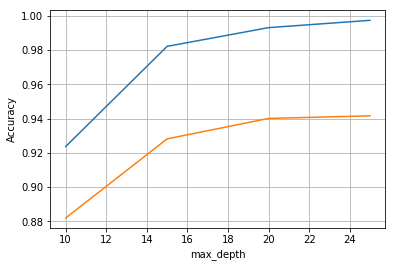

In [82]:
# Plotting accuracies with max_depth
plt.figure()

plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")

plt.grid(True)
plt.show()

After max_depth = 20, there is no significant improvement in accuracy with increase in max_depth. 
We will thus set **max_depth = 20**

##### Tuning n_estimators

In [83]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth = 20, random_state = 10)
rfgs1 = GridSearchCV(rf1, parameters, cv = 3, scoring = "accuracy", return_train_score = True)
rfgs1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [85]:
scores1 = rfgs1.cv_results_
pd.DataFrame(scores1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.651498,0.784753,0.136978,0.014604,50,{'n_estimators': 50},0.925205,0.931473,0.934449,0.930375,0.003853,4,0.993204,0.993767,0.993365,0.993445,0.000237
1,19.667732,0.103916,0.247005,0.003291,75,{'n_estimators': 75},0.928824,0.934288,0.937103,0.933405,0.003437,3,0.993364,0.993928,0.993646,0.993646,0.000230
2,28.068240,0.740997,0.349737,0.012223,100,{'n_estimators': 100},0.929307,0.934931,0.937907,0.934048,0.003566,2,0.993405,0.993606,0.993646,0.993552,0.000106
3,32.877735,0.140197,0.414890,0.026849,125,{'n_estimators': 125},0.930031,0.934690,0.938309,0.934343,0.003389,1,0.993445,0.993727,0.993646,0.993606,0.000119


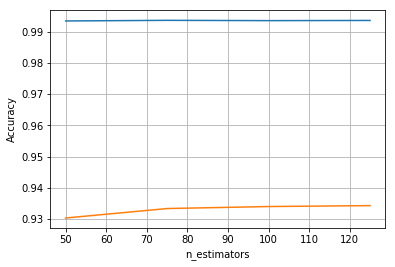

In [89]:
# Plotting accuracies with n_estimators
plt.figure()

plt.plot(scores1["param_n_estimators"], scores1["mean_train_score"], label="training accuracy")
plt.plot(scores1["param_n_estimators"], scores1["mean_test_score"], label="test accuracy")

plt.xlabel("n_estimators")
plt.ylabel("Accuracy")

plt.grid(True)
plt.show()

We will set **n_estimators = 75** after checking the above plot

##### Tuning max_features

In [90]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf2 = RandomForestClassifier(max_depth = 20, n_estimators = 75, random_state = 10)
rfgs2 = GridSearchCV(rf2, parameters, cv = 5, scoring = "accuracy", return_train_score = True)
rfgs2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=75,
                                              random_state=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [91]:
scores2 = rfgs2.cv_results_
pd.DataFrame(scores2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.391645,3.690330,0.147213,0.032210,4,{'max_features': 4},0.936997,0.938338,0.938874,0.941689,0.941555,0.939491,0.001845,1,0.993231,0.993432,0.993733,0.993130,0.992728,0.993251,0.000333
1,23.219715,3.686385,0.145013,0.022718,8,{'max_features': 8},0.936729,0.937399,0.938874,0.936595,0.940885,0.938097,0.001612,2,0.992996,0.993499,0.993666,0.993197,0.993130,0.993298,0.000247
2,34.905838,1.173706,0.132063,0.007395,14,{'max_features': 14},0.938472,0.936997,0.938338,0.936595,0.937399,0.937560,0.000736,3,0.991991,0.992594,0.993164,0.992225,0.992627,0.992520,0.000400
3,53.476356,2.939446,0.155000,0.015318,20,{'max_features': 20},0.937534,0.935791,0.936461,0.937399,0.937668,0.936971,0.000726,4,0.992326,0.991957,0.992728,0.992292,0.992527,0.992366,0.000257
4,60.918240,0.613653,0.134434,0.005284,24,{'max_features': 24},0.934316,0.933646,0.935523,0.934584,0.937131,0.935040,0.001207,5,0.991790,0.992292,0.991790,0.991588,0.991655,0.991823,0.000247


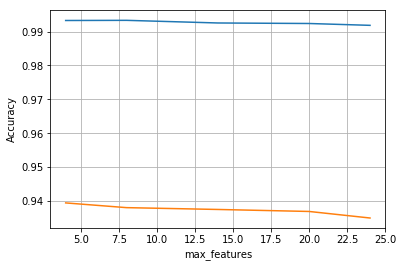

In [92]:
# Plotting accuracies with max_features
plt.figure()

plt.plot(scores2["param_max_features"], scores2["mean_train_score"], label="training accuracy")
plt.plot(scores2["param_max_features"], scores2["mean_test_score"], label="test accuracy")

plt.xlabel("max_features")
plt.ylabel("Accuracy")

plt.grid(True)
plt.show()

We will set **max_features = 4** after checking the above plot

##### Tuning min_samples_leaf

In [94]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf3 = RandomForestClassifier(max_depth = 20, n_estimators = 75, max_features = 4, random_state = 10)
rfgs3 = GridSearchCV(rf3, parameters, cv = 3, scoring = "accuracy", return_train_score = True)
rfgs3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, max_features=4,
                                              n_estimators=75,
                                              random_state=10),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [95]:
scores3 = rfgs3.cv_results_
pd.DataFrame(scores3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.708734,0.052274,0.112693,0.000814,100,{'min_samples_leaf': 100},0.803764,0.828762,0.824741,0.819089,0.010960,1,0.843883,0.836329,0.838782,0.839665,0.003146
1,4.921527,0.503416,0.120334,0.012434,150,{'min_samples_leaf': 150},0.794193,0.816778,0.814365,0.808445,0.010126,2,0.825987,0.821812,0.823380,0.823727,0.001722
2,4.922180,0.090295,0.123000,0.001881,200,{'min_samples_leaf': 200},0.785749,0.810746,0.805920,0.800805,0.010827,3,0.817220,0.813166,0.812241,0.814209,0.002162
3,4.621990,0.009189,0.119331,0.003656,250,{'min_samples_leaf': 250},0.779878,0.801657,0.799887,0.793807,0.009876,4,0.812073,0.803273,0.804882,0.806743,0.003826
4,4.452438,0.019231,0.104051,0.001246,300,{'min_samples_leaf': 300},0.774570,0.800370,0.796188,0.790376,0.011306,5,0.805075,0.799574,0.799292,0.801314,0.002662


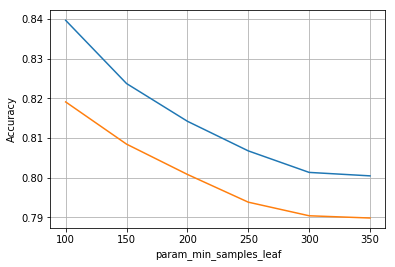

In [98]:
# Plotting accuracies with min_samples_leaf
plt.figure()

plt.plot(scores3["param_min_samples_leaf"], scores3["mean_train_score"], label="training accuracy")
plt.plot(scores3["param_min_samples_leaf"], scores3["mean_test_score"], label="test accuracy")

plt.xlabel("param_min_samples_leaf")
plt.ylabel("Accuracy")

plt.grid(True)
plt.show()

We will set **min_samples_leaf = 100** after checking the above plot

##### Tuning min_samples_split

In [99]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf4 = RandomForestClassifier(max_depth = 20, n_estimators = 75, max_features = 4, min_samples_leaf = 100, random_state = 10)
rfgs4 = GridSearchCV(rf4, parameters, cv = 3, scoring = "accuracy", return_train_score = True)
rfgs4.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, max_features=4,
                                              min_samples_leaf=100,
                                              n_estimators=75,
                                              random_state=10),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [100]:
scores4 = rfgs4.cv_results_
pd.DataFrame(scores4).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.706084,0.053777,0.114039,0.000478,50,{'min_samples_split': 50},0.803764,0.828762,0.824741,0.819089,0.010960,1,0.843883,0.836329,0.838782,0.839665,0.003146
1,5.273866,0.383377,0.128668,0.008564,100,{'min_samples_split': 100},0.803764,0.828762,0.824741,0.819089,0.010960,1,0.843883,0.836329,0.838782,0.839665,0.003146
2,5.629251,0.019416,0.132671,0.006131,150,{'min_samples_split': 150},0.803764,0.828762,0.824741,0.819089,0.010960,1,0.843883,0.836329,0.838782,0.839665,0.003146
3,5.641593,0.051063,0.137627,0.005872,200,{'min_samples_split': 200},0.803764,0.828762,0.824741,0.819089,0.010960,1,0.843883,0.836329,0.838782,0.839665,0.003146
4,5.673506,0.170085,0.129656,0.004978,250,{'min_samples_split': 250},0.799823,0.825545,0.820558,0.815309,0.011138,5,0.836886,0.832951,0.833353,0.834397,0.001768


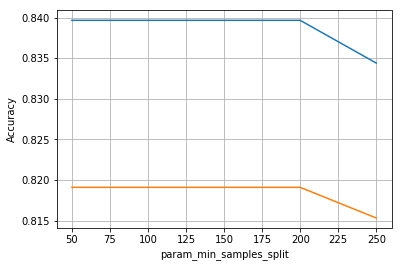

In [101]:
# Plotting accuracies with min_samples_split
plt.figure()

plt.plot(scores4["param_min_samples_split"], scores4["mean_train_score"], label="training accuracy")
plt.plot(scores4["param_min_samples_split"], scores4["mean_test_score"], label="test accuracy")

plt.xlabel("param_min_samples_split")
plt.ylabel("Accuracy")

plt.grid(True)
plt.show()

We will set **min_samples_split = 150** after checking the above plot

In [102]:
rf_final = RandomForestClassifier(max_depth = 20, n_estimators = 75, max_features = 4, min_samples_leaf = 100, min_samples_split = 150, random_state = 10)

In [106]:
# Fitting
rf_final.fit(X_train_pca, y_train_res)
        
# Predict training set:
dtrain_predictions = rf_final.predict(X_train_pca)
dtrain_predprob = rf_final.predict_proba(X_train_pca)[:,1]
    
# Perform cross-validation:
cv_score = cross_val_score(rf_final, X_train_pca, y_train_res, cv = 5, scoring = 'roc_auc')
    
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train_res, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_res, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_res, dtrain_predprob))
    
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))


Model Report
Accuracy : 0.851
Recall/Sensitivity : 0.8231
AUC Score (Train): 0.930743
CV Score : Mean - 0.9072256 | Std - 0.008735248 | Min - 0.8904788 | Max - 0.9150695


In [107]:
# Predict on test data
predictions = rf_final.predict(X_test_pca)

In [109]:
confusion = metrics.confusion_matrix(y_test, predictions)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test, predictions)))
print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_test, predictions)))

Roc_auc_score : 0.7566503930098579
Sensitivity/Recall : 0.6467505241090147
Specificity: 0.866550261910701
False Positive Rate: 0.13344973808929908
Positive predictive value: 0.3657379964433906
Negative Predictive value: 0.9537405628002745
sklearn precision score value: 0.3657379964433906


In [112]:
# Predict with 0.5 prob cutoff
pred_probs = rf_final.predict_proba(X_train_pca)[:,1]
    
y_df = pd.DataFrame({'churn': y_train_res, 'churn_Prob': pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_df.churn, y_df.final_predicted)))

Roc_auc_score : 0.8509919571045577
Sensitivity/Recall : 0.8231099195710456
Specificity: 0.8788739946380697
False Positive Rate: 0.1211260053619303
Positive predictive value: 0.8717206132879046
Negative Predictive value: 0.8324530218384967
sklearn precision score value: 0.8717206132879046


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.501555  1.000000  0.003110
0.2   0.2  0.573887  0.999839  0.147936
0.3   0.3  0.735147  0.988954  0.481340
0.4   0.4  0.840858  0.937534  0.744182
0.5   0.5  0.850992  0.823110  0.878874
0.6   0.6  0.798686  0.651743  0.945630
0.7   0.7  0.721260  0.465362  0.977158
0.8   0.8  0.622627  0.252172  0.993083
0.9   0.9  0.526729  0.053834  0.999625


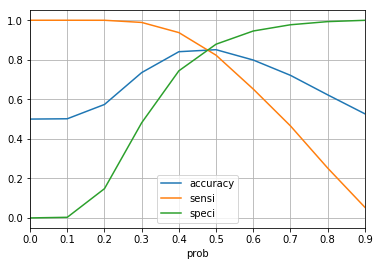

In [117]:
# Let's explore the different cut-off probabilities

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_df[i] = y_df.churn_Prob.map( lambda x: 1 if x > i else 0)

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_df.churn, y_df[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
        
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i , accuracy, sensi, speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.grid(True)
plt.show()

We see the optimal cutoff at about 0.47 probability.

In [118]:
# Predict with 0.47 probability cutoff
pred_probs = rf_final.predict_proba(X_train_pca)[:,1]
    
y_df = pd.DataFrame({'churn': y_train_res, 'churn_Prob': pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.47 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > 0.47 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_df.churn, y_df.final_predicted)))

Roc_auc_score : 0.8556300268096515
Sensitivity/Recall : 0.8638605898123325
Specificity: 0.8473994638069705
False Positive Rate: 0.1526005361930295
Positive predictive value: 0.8498707601413725
Negative Predictive value: 0.8615820749059587
sklearn precision score value: 0.8498707601413725


##### Making predictions on the Test Data

In [120]:
# Predict with 0.47 probability cutoff
pred_probs = rf_final.predict_proba(X_test_pca)[:,1]
    
y_df = pd.DataFrame({'churn': y_test, 'churn_Prob': pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.47 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > 0.47 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_df.churn, y_df.final_predicted)))

Roc_auc_score : 0.7682027544942118
Sensitivity/Recall : 0.7044025157232704
Specificity: 0.8320029932651534
False Positive Rate: 0.1679970067348466
Positive predictive value: 0.3328380386329866
Negative Predictive value: 0.9594419674960448
sklearn precision score value: 0.3328380386329866


#### Random Forest Result

Random Forest with PCA and hyper-parameter tuning and selecting an optimal probability cutoff of 0.47 we get

- Train Recall : 86% and Train ROC_AUC_Score : 86%
- Test Recall  : 71% and Test  ROC_AUC_Score : 77% 

### Model 3: XGBoost Classifier

In [121]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [122]:
# Fitting
xgb1.fit(X_train_pca, y_train_res)
        
# Predict training set:
dtrain_predictions = xgb1.predict(X_train_pca)
dtrain_predprob = xgb1.predict_proba(X_train_pca)[:,1]
    
# Perform cross-validation:
cv_score = cross_val_score(xgb1, X_train_pca, y_train_res, cv = 5, scoring = 'roc_auc')
    
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train_res, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_res, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_res, dtrain_predprob))
    
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))


Model Report
Accuracy : 0.9999
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9868618 | Std - 0.002227033 | Min - 0.9825086 | Max - 0.9884583


The above model clearly overfitted. We will now tune the hyper parameters

In [124]:
param_test1 = {'n_estimators': range(100, 200, 20)}

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [127]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 180}, 0.8986598946181245)

In [128]:
param_test2 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=180, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=180, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_m

In [129]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9437535358412842)

In [130]:
param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}

gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=180, max_depth=9, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test3, scoring='accuracy', n_jobs=4, iid=False, cv=3)
gsearch3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=180, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_meth

In [131]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.3}, 0.9444505946867435)

In [132]:
# Building the final model with all the tunned params

xgb_final = XGBClassifier(learning_rate=0.1, n_estimators=180, max_depth=9, gamma=0.3, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [133]:
# Fitting
xgb_final.fit(X_train_pca, y_train_res)
        
# Predict training set:
dtrain_predictions = xgb_final.predict(X_train_pca)
dtrain_predprob = xgb_final.predict_proba(X_train_pca)[:,1]
    
# Perform cross-validation:
cv_score = cross_val_score(xgb_final, X_train_pca, y_train_res, cv = 5, scoring = 'roc_auc')
    
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train_res, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_res, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_res, dtrain_predprob))
    
print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))


Model Report
Accuracy : 0.9999
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9878701 | Std - 0.001944884 | Min - 0.9840733 | Max - 0.9893877


In [134]:
# Predict on test data
predictions = xgb_final.predict(X_test_pca)

In [135]:
confusion = metrics.confusion_matrix(y_test, predictions)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_test, predictions)))
print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_test, predictions)))

Roc_auc_score : 0.7348818930990177
Sensitivity/Recall : 0.5377358490566038
Specificity: 0.9320279371414317
False Positive Rate: 0.06797206285856822
Positive predictive value: 0.4848771266540643
Negative Predictive value: 0.944275966641395
sklearn precision score value: 0.4848771266540643


In [136]:
# Predict with 0.5 prob cutoff
pred_probs = xgb_final.predict_proba(X_train_pca)[:,1]
    
y_df = pd.DataFrame({'churn': y_train_res, 'churn_Prob': pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_df.churn, y_df.final_predicted)))

Roc_auc_score : 0.999946380697051
Sensitivity/Recall : 1.0
Specificity: 0.9998927613941019
False Positive Rate: 0.00010723860589812332
Positive predictive value: 0.9998927728929874
Negative Predictive value: 1.0
sklearn precision score value: 0.9998927728929874


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.978472  1.000000  0.956944
0.2   0.2  0.995496  1.000000  0.990992
0.3   0.3  0.998767  1.000000  0.997534
0.4   0.4  0.999678  1.000000  0.999357
0.5   0.5  0.999946  1.000000  0.999893
0.6   0.6  1.000000  1.000000  1.000000
0.7   0.7  1.000000  1.000000  1.000000
0.8   0.8  0.999491  0.998981  1.000000
0.9   0.9  0.993083  0.986166  1.000000


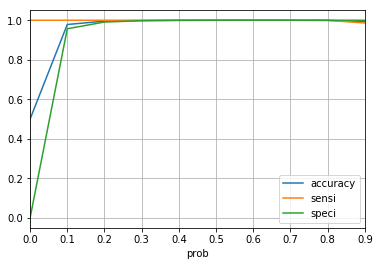

In [137]:
# Let's explore the different cut-off probabilities

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_df[i] = y_df.churn_Prob.map( lambda x: 1 if x > i else 0)

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_df.churn, y_df[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
        
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i , accuracy, sensi, speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.grid(True)
plt.show()

In [138]:
# Predict with 0.1 prob cutoff
pred_probs = xgb_final.predict_proba(X_train_pca)[:,1]
    
y_df = pd.DataFrame({'churn': y_train_res, 'churn_Prob': pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.1 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_df.churn, y_df.final_predicted)))

Roc_auc_score : 0.9784718498659518
Sensitivity/Recall : 1.0
Specificity: 0.9569436997319035
False Positive Rate: 0.043056300268096516
Positive predictive value: 0.9587210198941037
Negative Predictive value: 1.0
sklearn precision score value: 0.9587210198941037


##### Making predictions on test data

In [140]:
# Predict with 0.1 probability cutoff
pred_probs = xgb_final.predict_proba(X_test_pca)[:,1]
    
y_df = pd.DataFrame({'churn': y_test, 'churn_Prob': pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.1 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

confusion = metrics.confusion_matrix(y_df.churn, y_df.final_predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Roc_auc_score : {}".format(metrics.roc_auc_score(y_df.churn, y_df.final_predicted)))
print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
print('Specificity: {}'.format(TN / float(TN + FP)))
print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
print('Positive predictive value: {}'.format(TP / float(TP + FP)))
print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
print('sklearn precision score value: {}'.format(metrics.precision_score(y_df.churn, y_df.final_predicted)))

Roc_auc_score : 0.7941421633609493
Sensitivity/Recall : 0.7872117400419287
Specificity: 0.8010725866799701
False Positive Rate: 0.19892741332002994
Positive predictive value: 0.32011935208866155
Negative Predictive value: 0.9693631150015092
sklearn precision score value: 0.32011935208866155


#### XGBoost Result

XGBoost with PCA and hyper-parameter tuning and selecting an optimal probability cutoff of 0.1 we get

- Train Recall : 100% and Train ROC_AUC_Score : 98%
- Test Recall  : 80% and Test  ROC_AUC_Score : 78% 

#### Results of Predictive Model:
Recall will be the most decisive factor for the customer churn problem. This is because, not being able to correctly predict a customer who will churn has a greater loss associated with it than predicting a customer who will stay in the network as a churn customer.

- We can consider using the Lpgistic Regression Model for prediction as it not only has the best value for recall among the models trained but also has a very less difference in recall and ROC_AUC_Score of train and test data as compared to Random Forest and XGBoost
- XGBoost has a better performance in this regard than random forest. However, it shows signs of heavy over-fitting.


### Model Building 2 : Finding out Factors Influencing Churn

In [198]:
param_grid = {'max_depth': [8,10,12], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100,200, 300], 'max_features': [12, 15, 20]}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 4,verbose = 1)

In [199]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 35.0min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 176.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [200]:
grid_search.best_score_,grid_search.best_params_

(0.8760324208057045,
 {'max_depth': 12,
  'max_features': 20,
  'min_samples_leaf': 100,
  'min_samples_split': 200,
  'n_estimators': 100})

In [204]:
# Setting up Random Forest with the optimal hyper-parameter values
rf_final = RandomForestClassifier(max_depth = 12, max_features = 20, min_samples_leaf = 100, min_samples_split = 200, n_estimators = 100)

In [205]:
rf_final.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200)

In [239]:
# Sorting the features based on their importance towards explaining the churn.

df = pd.Series(rf_final.feature_importances_, index=X.columns)

In [240]:
df.head()

arpu_6         0.001047
arpu_7         0.002107
arpu_8         0.055142
onnet_mou_6    0.000881
onnet_mou_7    0.000508
dtype: float64

In [241]:
df = df.reset_index()

In [242]:
df.columns

Index(['index', 0], dtype='object')

In [243]:
df.rename(columns = {'index':'Features', 0:'values'}, inplace = True) 

In [244]:
df.columns

Index(['Features', 'values'], dtype='object')

In [245]:
df.head()

,Features,values
0,arpu_6,0.001047
1,arpu_7,0.002107
2,arpu_8,0.055142
3,onnet_mou_6,0.000881
4,onnet_mou_7,0.000508


In [250]:
df.sort_values(by='values', ascending=False, inplace=True)

In [251]:
df.head()

,Features,values
53,loc_ic_t2m_mou_8,0.109972
20,loc_og_t2m_mou_8,0.103929
153,total_rech_month_8,0.079666
83,total_rech_amt_8,0.063835
11,roam_ic_mou_8,0.057080


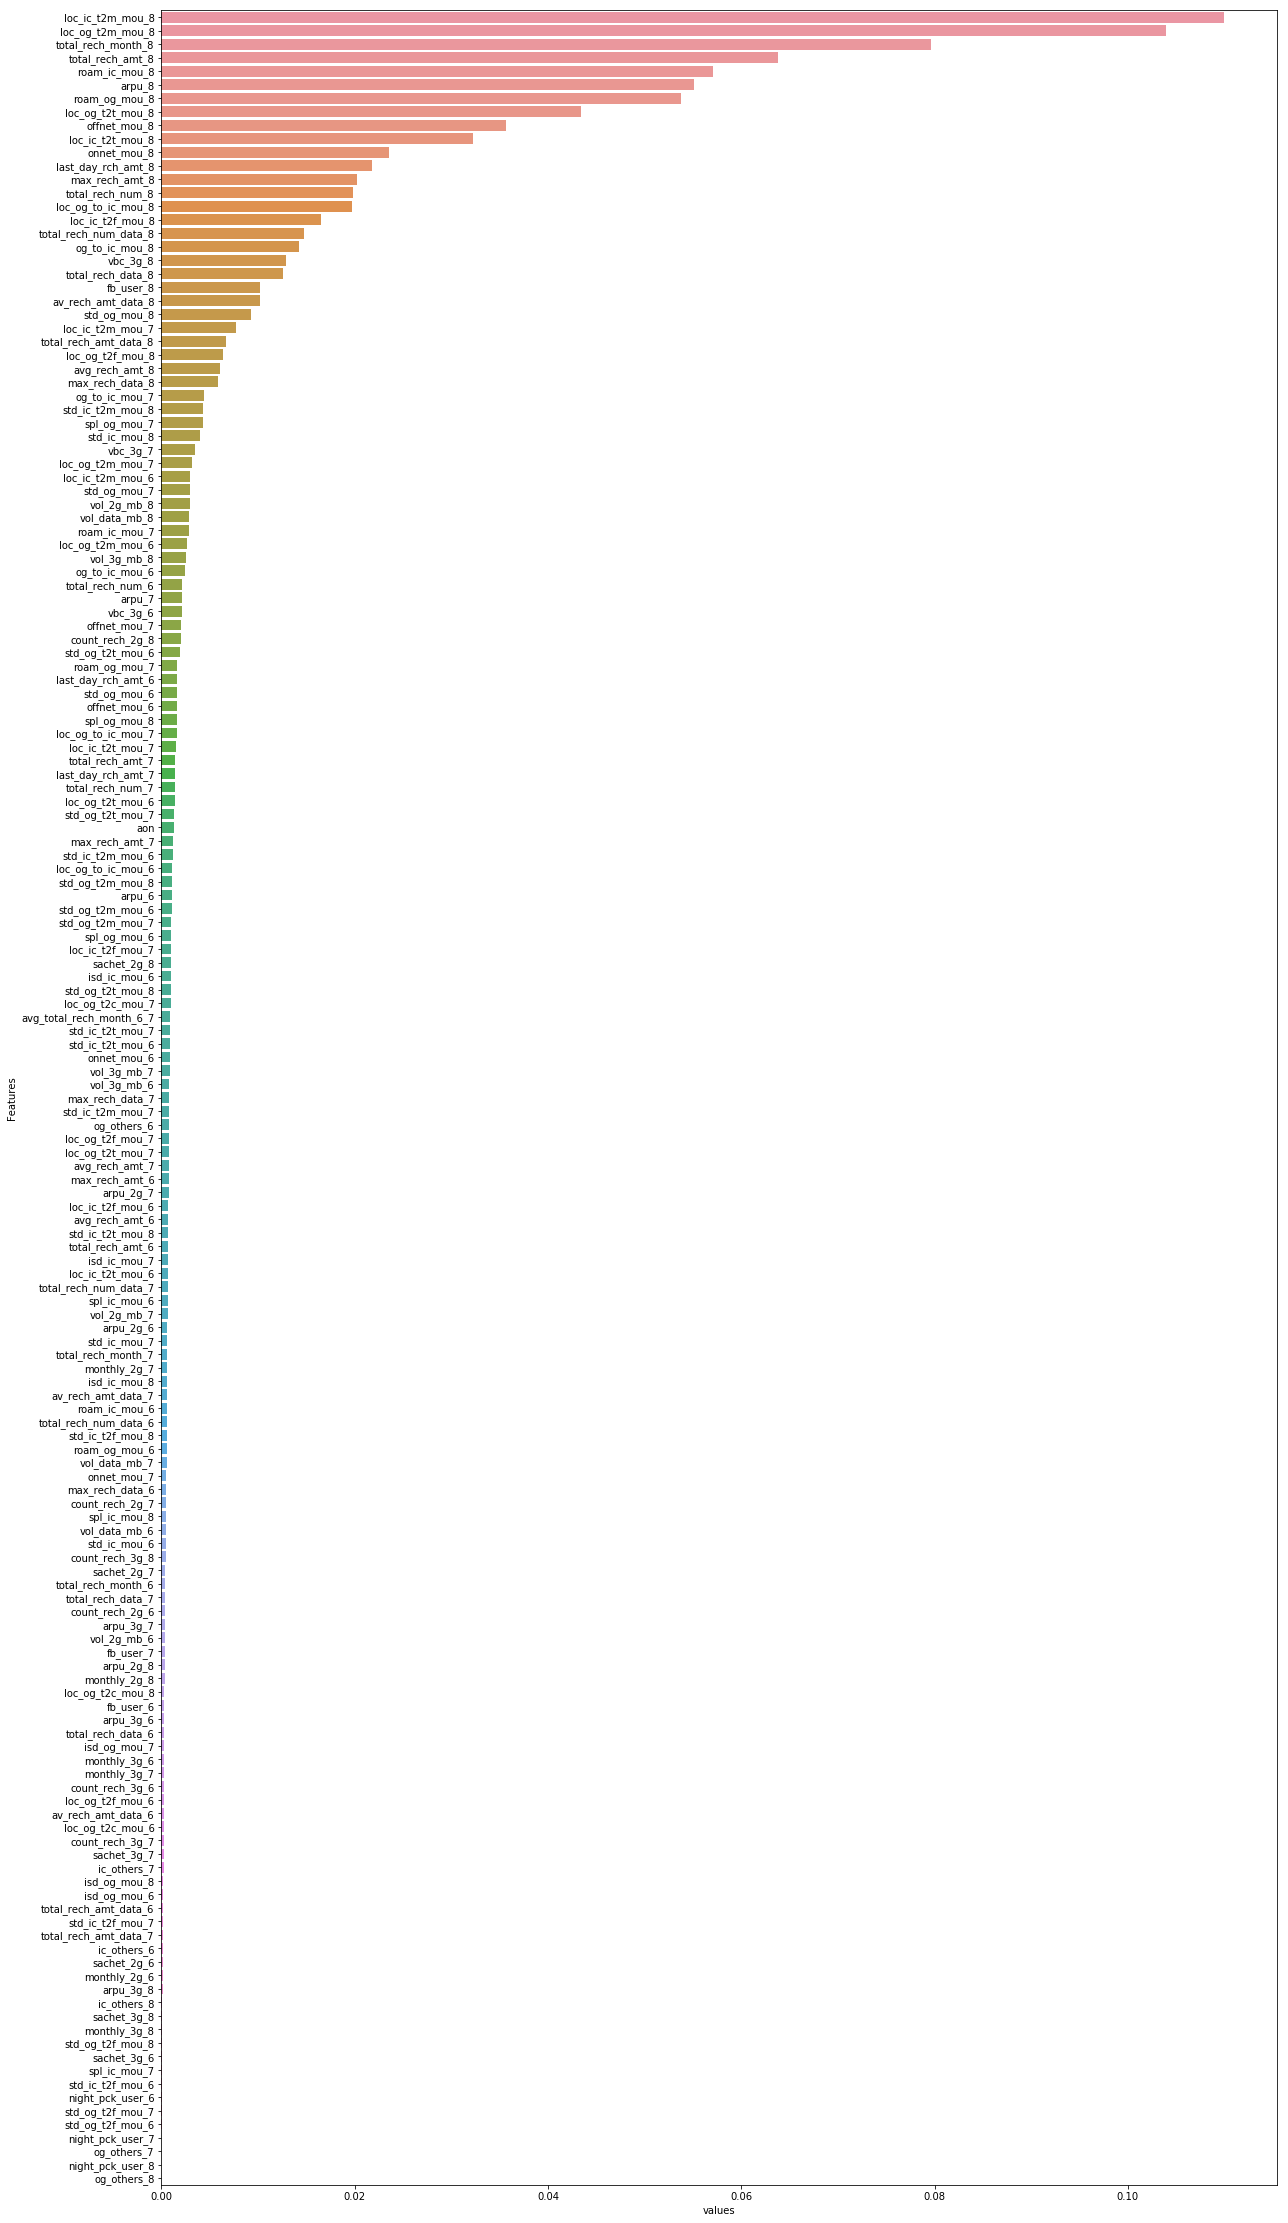

In [261]:
plt.figure(figsize=(20,40))
sns.barplot(data=df, x='values',y='Features')

We pick up a chunk of the features from the top to visualize better


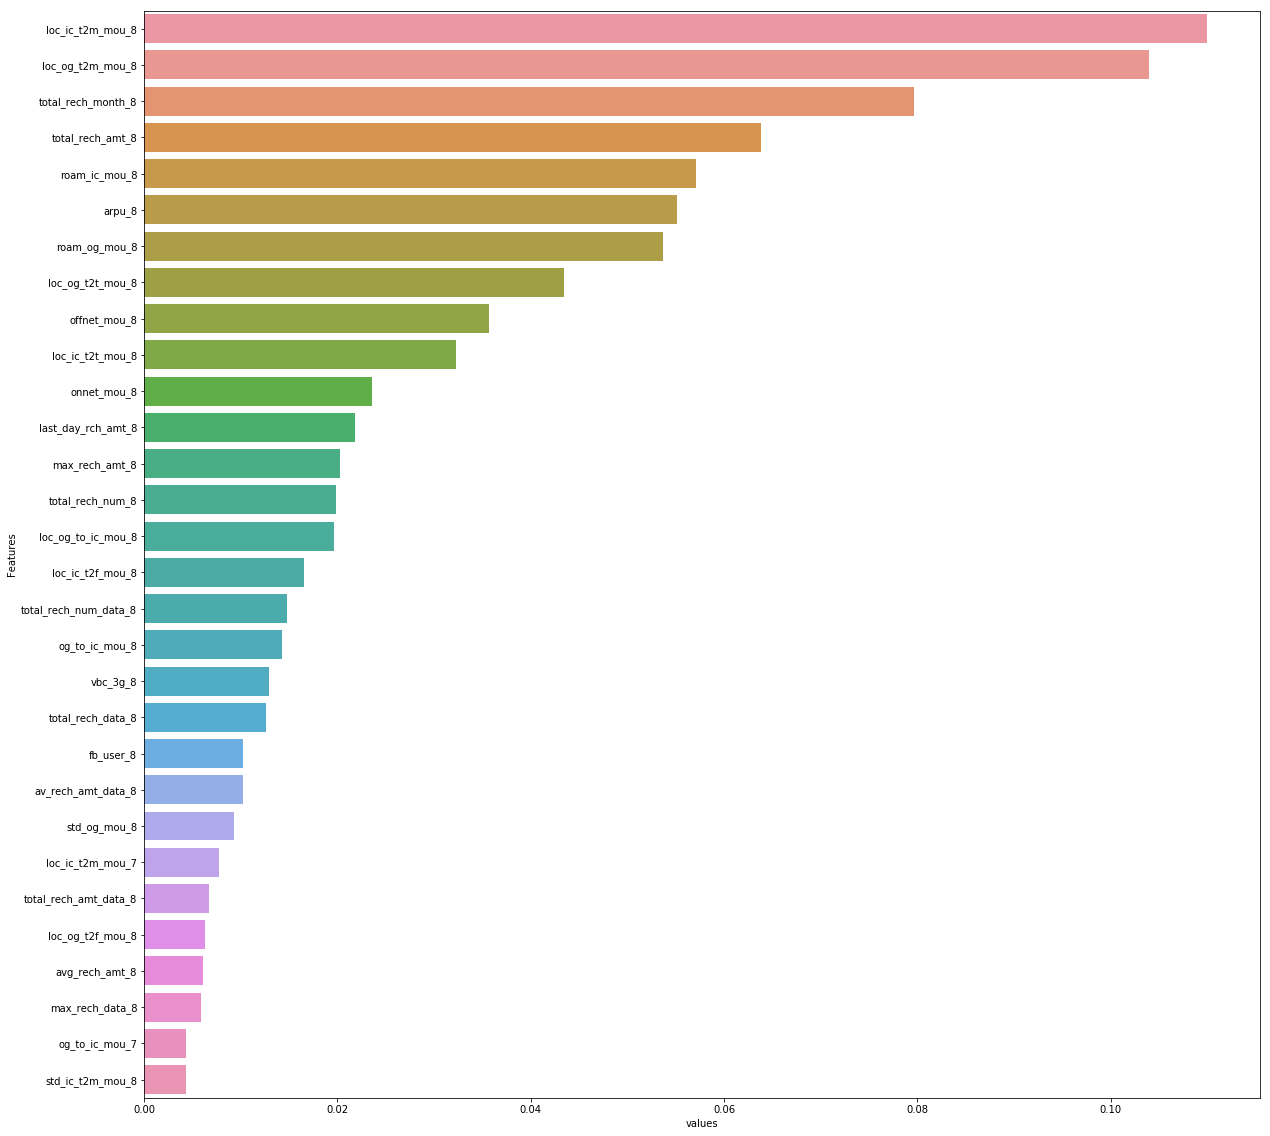

In [266]:
plt.figure(figsize=(20,20))
sns.barplot(data=df.head(30), x='values',y='Features')

#### Factors driving churn prediction

The most important factors that should help in determining churn are as follows:

- loc_ic_t2m_mou_8 -- local incoming calls to another operator minutes of usage in month 8
- loc_og_t2m_mou_8 -- local outgoing calls to another operator minutes of usage in month 8
- total_rech_month_8 -- total recharge (data + phone) amount in month 8
- total_rech_amt_8 -- total recharge amount in month 8
- roam_ic_mou_8 -- incoming roaming calls minutes of usage in month 8
- arpu_8 -- average revenue per user in month 8
- roam_og_mou_8 -- outgoing roaming calls minutes of usage in month 8
- loc_og_t2n_mou_8 -- local outgoing calls minutes of usage to other operator mobile in month 8

#### Strategies to manage customer churn

##### Monitoring of Drop in usage

We can see that a drop in incoming and outgoing calls is a strong indicator that the user is about to churn.

##### Monitoring of Drop in recharge amount

A drop in recharge amount of both data and call plans shows that probably the operator is charging more than it's competitors. In a market where high value customers can be presumed to maintain 2 cell connections, they are probably treating this connection as a backup option and have reduced the recharge amount. Though not already churned, they are set on the path of it. The company should strategise and dish out lucratic offers to these users to gain their loyalty back.

,total_rech_month_6,total_rech_month_7,total_rech_month_8
churn_flag,,,
0,1106.236866,1211.474085,1121.907699
1,1216.503101,1023.064327,451.302057


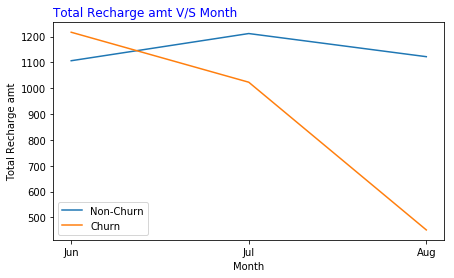

In [268]:
total_rech_month_list = ['total_rech_month_6', 'total_rech_month_7', 'total_rech_month_8']

# Total monthly recharge vs Churn
fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[total_rech_month_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Total Recharge amt V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Total Recharge amt")

churn.groupby(['churn_flag'])[total_rech_month_list].mean()

##### Changes in Roaming plans

Both incoming and outgoing roaming usage seems to be a good indicator of churn. A reduction in this is indicating towards a possible churn

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
churn_flag,,,
0,15.208094,11.122986,11.187364
1,23.851606,25.356016,23.588669


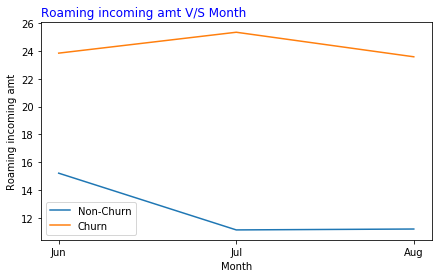

In [269]:
roam_ic_mou_list = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8']

fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[roam_ic_mou_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Roaming incoming amt V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Roaming incoming amt")

churn.groupby(['churn_flag'])[roam_ic_mou_list].mean()

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn_flag,,,
0,24.690183,17.552388,17.803536
1,42.546905,41.860991,37.323419


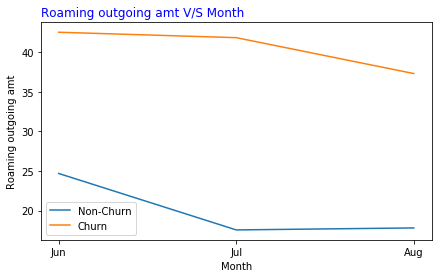

In [270]:
roam_og_mou_list = ['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']

fig, ax = plt.subplots(figsize=(7,4))
df = churn.groupby(['churn_flag'])[roam_og_mou_list].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])

plt.legend(['Non-Churn', 'Churn'])

plt.title("Roaming outgoing amt V/S Month", loc='left', fontsize=12, fontweight=1, color='Blue')
plt.xlabel("Month")
plt.ylabel("Roaming outgoing amt")

churn.groupby(['churn_flag'])[roam_og_mou_list].mean()

Investigation should be done regarding the roaming plans offered by the competing network providers and align the plans in a more competitive manner.

They should also take notice of the quality of service when it comes to roaming. 

Roaming is a huge revenue earner. So losing customers who avail roaming services will be a huge loss maker for the company.

Hence better value should be proivded to customers availing these services.